In [1]:
import pandas as pd
import networkx as nx
import re
import sys

nodes=pd.read_csv('nodes.csv')
edges=pd.read_csv('edges.csv')

float_re=re.compile(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?')

def parse_position_string(pos_str):
    nums = float_re.findall(str(pos_str))
    return float(nums[0]), float(nums[1])

G=nx.Graph()

for _, row in nodes.iterrows():
    x, y= parse_position_string(row['pos'])
    G.add_node(row['index'], x=x, y=y)

for _, row in edges.iterrows():
    G.add_edge(row['source'], row['target'])

nx.write_gexf(G, 'network.gexf')

C:\Users\anna-\AppData\Local\Temp\ipykernel_32272\2322867886.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", num_comms)  # up to 20 visually distinct colors


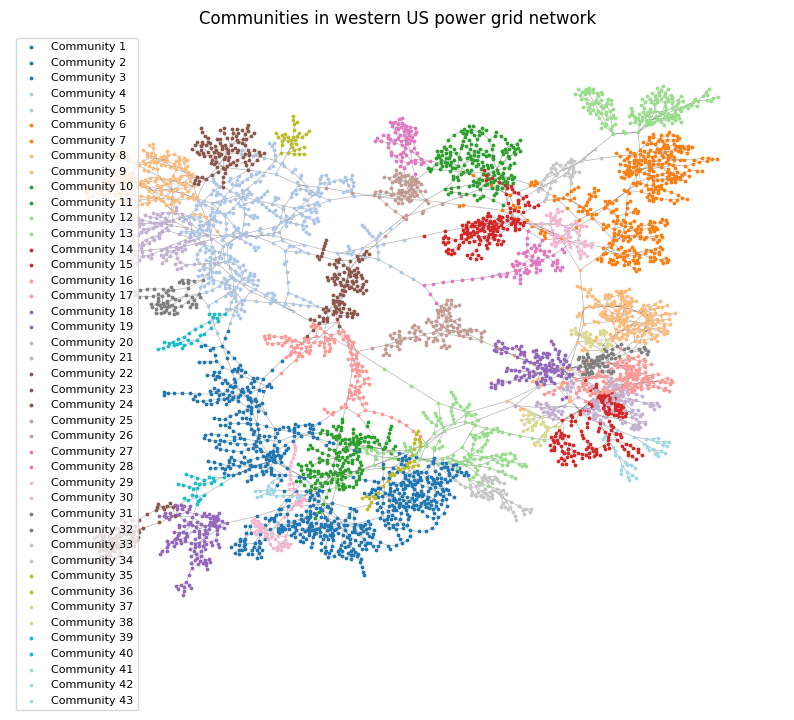

In [6]:
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.cm as cm
import numpy as np

communities=list(greedy_modularity_communities(G))

for i,comm in enumerate(communities):
    for node in comm:
        G.nodes[node]['community'] = i

pos={n: (G.nodes[n]['x'], G.nodes[n]['y']) for n in G.nodes if 'x' in G.nodes[n] and 'y' in G.nodes[n]}

num_comms = len(communities)
cmap = cm.get_cmap("tab20", num_comms)  # up to 20 visually distinct colors

plt.figure(figsize=(10,8))
plt.axis('off')

for i, comm in enumerate(communities):
    color= cmap(i % cmap.N)
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=list(comm),
        node_size=3,
        node_color=[color],
        label=f"Community {i+1}"
    )

nx.draw_networkx_edges(G, pos, alpha= 0.3, width= 0.5)

plt.legend(scatterpoints=1, fontsize=8)
plt.title(f'Communities in western US power grid network', fontsize=12)
plt.show()